## Computer Vision
## B2 Batch Roll 33 Bhaskar Bidyanta
## Mini Project TA 2 
### Shi Tomasi
### Harris Corner Detection
### SIFT Keypoint matching and detection

## SIFT Keypoint Detection and Matching

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
import cv2

In [13]:
img1 = cv2.imread('practical1.jpg')
img2 = cv2.imread('practical2.jpg')

In [14]:
# Convert to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [15]:
# SIFT
sift = cv2.SIFT_create()
kp1,des1 = sift.detectAndCompute(gray1,None)
kp2,des2 = sift.detectAndCompute(gray2,None)

In [16]:
#BFMatcher
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

In [17]:
#Ratio test
good = []
for m,n in matches:
    if m.distance < 0.75 * n.distance:
        good.append([m])

In [18]:
#Draw matches
matched_img = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)

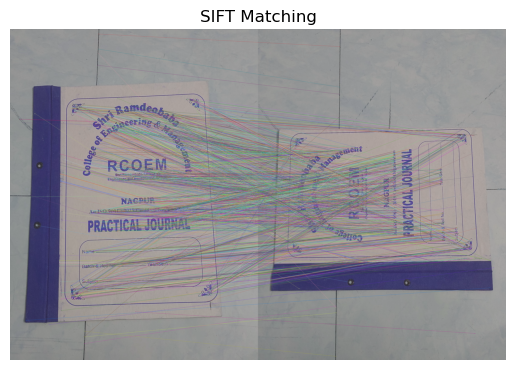

In [19]:
# Show image
plt.imshow(matched_img)
plt.axis('off')
plt.title("SIFT Matching")
plt.show()

## Harris Corner Detection

In [59]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [60]:
img = cv2.imread('powerplant.jpg')

In [61]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

In [62]:
#Harris Detector
dst = cv2.cornerHarris(gray,blockSize=2,ksize=3,k=0.04)
dst = cv2.dilate(dst,None)

In [63]:
img[dst > 0.01 * dst.max()] = 255

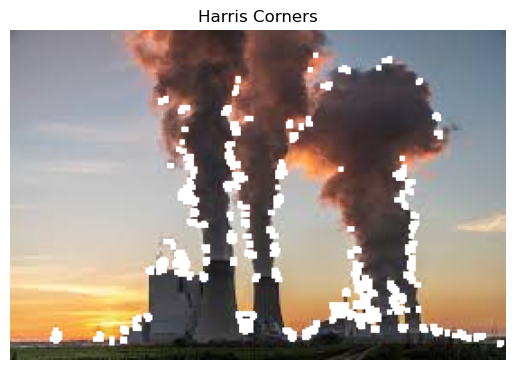

In [64]:
#Display
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title('Harris Corners')
plt.axis('off')
plt.show()

## Shi-Tomasi Corner Detection

C:\Users\Bhaskar\AppData\Local\Temp\ipykernel_21708\876352171.py:11: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


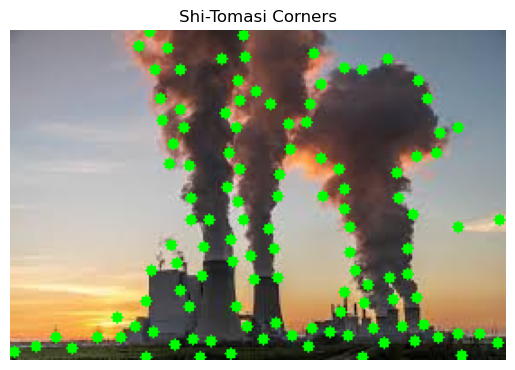

In [65]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread('powerplant.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Shi-Tomasi
corners = cv2.goodFeaturesToTrack(gray, 1000, qualityLevel=0.01, minDistance=10)
corners = np.int0(corners)

# Draw corners
for i in corners:
    x, y = i.ravel()
    cv2.circle(img, (x, y), 3, (0, 255, 0), -1)

# Show
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Shi-Tomasi Corners")
plt.axis('off')
plt.show()
